# 数据探索性分析与数据预处理

In [124]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Trending YouTube Video Statistics

In [125]:
df_ytb = pd.read_csv("./YTB/USvideos.csv")
print(df_ytb.nunique())

video_id                   6351
trending_date               205
title                      6455
channel_title              2207
category_id                  16
publish_time               6269
tags                       6055
views                     40478
likes                     29850
dislikes                   8516
comment_count             13773
thumbnail_link             6352
comments_disabled             2
ratings_disabled              2
video_error_or_removed        2
description                6901
dtype: int64


In [126]:
#查找缺失值以及数据类型
df_ytb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

可以发现本数据集没有缺失值，因此无需进行数据缺失处理。

### 数据可视化和摘要

标称属性有trending_date（在榜日期），category_id（视频分类id），tags（视频标签），comments_disabled（评论是否关闭），ratings_disabled（评分是否关闭），video_error_or_removed（视频是否不可用）

In [127]:
treCount = df_ytb['trending_date'].value_counts()
print(treCount)


18.25.01    200
17.07.12    200
18.09.03    200
18.23.03    200
18.10.02    200
           ... 
18.31.01    197
18.01.02    197
18.04.02    196
18.02.02    196
18.03.02    196
Name: trending_date, Length: 205, dtype: int64


In [128]:
cateIdCount = df_ytb['category_id'].value_counts()
print(cateIdCount)


24    9964
10    6472
26    4146
23    3457
22    3210
25    2487
28    2401
1     2345
17    2174
27    1656
15     920
20     817
19     402
2      384
43      57
29      57
Name: category_id, dtype: int64


In [129]:
tagsCount = df_ytb['tags'].value_counts()
print(tagsCount)

[none]                                                                                                                                                                                                                                                                                                                                                                                                                                                             1535
ABC|"americanidol"|"idol"|"american idol"|"ryan"|"seacrest"|"ryan seacrest"|"katy"|"perry"|"katy perry"|"luke"|"bryan"|"luke bryan"|"lionel"|"richie"|"lionel richie"|"season 16"|"american idol XVI"|"television"|"ad"|"spring"|"2018"|"music"|"reality"|"competition"|"song"|"sing"|"audition"|"auditions"|"performance"|"live"|"fox"|"AI"|"hollywood"|"contestant"|"official"|"american"|"official american idol"|"hollywood week"|"hometown audition"            87
Jacksfilms|"Jack Douglass"|"YGS"|"YGS 100"|"YGS 50"|"The Best of Your Grammar Sucks"|"Yo

In [130]:
comDisCount = df_ytb['comments_disabled'].value_counts()
print(comDisCount)

False    40316
True       633
Name: comments_disabled, dtype: int64


In [131]:
ratDisCount = df_ytb['ratings_disabled'].value_counts()
print(ratDisCount)

False    40780
True       169
Name: ratings_disabled, dtype: int64


In [132]:
vidInvalidCount = df_ytb['video_error_or_removed'].value_counts()
print(vidInvalidCount)

False    40926
True        23
Name: video_error_or_removed, dtype: int64


数值属性有views（观看数）， likes（喜欢数）， dislikes（不喜欢数）， comment_count（评论数）

In [133]:
print(df_ytb['views'].quantile([0,0.25,0.5,0.75,1]))
print("缺失值个数：" + str(df_ytb['views'].isnull().sum()))

0.00          549.0
0.25       242329.0
0.50       681861.0
0.75      1823157.0
1.00    225211923.0
Name: views, dtype: float64
缺失值个数：0


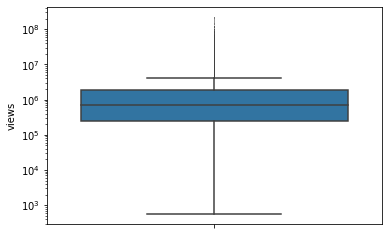

In [134]:
views_plot = sns.boxplot(data = df_ytb, y=df_ytb['views'], orient='v',fliersize = 0.1)
views_plot.set_yscale('log')

In [135]:
print(df_ytb['likes'].quantile([0,0.25,0.5,0.75,1]))
print("缺失值个数：" + str(df_ytb['likes'].isnull().sum()))

0.00          0.0
0.25       5424.0
0.50      18091.0
0.75      55417.0
1.00    5613827.0
Name: likes, dtype: float64
缺失值个数：0


C:\Users\lakeh\anaconda3\lib\site-packages\seaborn\_core.py:1312: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


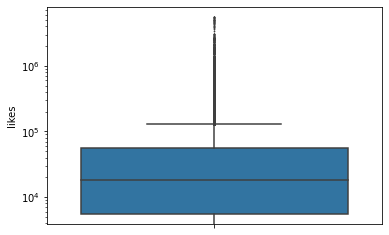

In [136]:
like_plot = sns.boxplot(data = df_ytb, y=df_ytb['likes'], orient='h',fliersize = 1)
like_plot.set_yscale('log')


In [137]:
print(df_ytb['dislikes'].quantile([0,0.25,0.5,0.75,1]))
print("缺失值个数：" + str(df_ytb['dislikes'].isnull().sum()))

0.00          0.0
0.25        202.0
0.50        631.0
0.75       1938.0
1.00    1674420.0
Name: dislikes, dtype: float64
缺失值个数：0


C:\Users\lakeh\anaconda3\lib\site-packages\seaborn\_core.py:1312: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


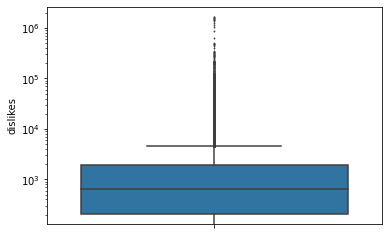

In [138]:
dislike_plot = sns.boxplot(data = df_ytb, y=df_ytb['dislikes'], orient='h',fliersize = 1)
dislike_plot.set_yscale('log')

In [139]:
print(df_ytb['comment_count'].quantile([0,0.25,0.5,0.75,1]))
print("缺失值个数：" + str(df_ytb['comment_count'].isnull().sum()))

0.00          0.0
0.25        614.0
0.50       1856.0
0.75       5755.0
1.00    1361580.0
Name: comment_count, dtype: float64
缺失值个数：0


C:\Users\lakeh\anaconda3\lib\site-packages\seaborn\_core.py:1312: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


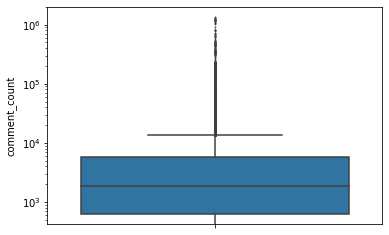

In [140]:
comment_plot = sns.boxplot(data = df_ytb, y=df_ytb['comment_count'], orient='h',fliersize = 1)
comment_plot.set_yscale('log')

### 数据缺失的处理

## Wine Reviews

In [141]:
df_wine = pd.read_csv("./wine/winemag-data_first150k.csv",delimiter=',',low_memory=False)
print(df_wine.nunique())

Unnamed: 0     150930
country            48
description     97821
designation     30621
points             21
price             357
province          455
region_1         1236
region_2           18
variety           632
winery          14810
dtype: int64


In [142]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   150930 non-null  int64  
 1   country      150925 non-null  object 
 2   description  150930 non-null  object 
 3   designation  105195 non-null  object 
 4   points       150930 non-null  int64  
 5   price        137235 non-null  float64
 6   province     150925 non-null  object 
 7   region_1     125870 non-null  object 
 8   region_2     60953 non-null   object 
 9   variety      150930 non-null  object 
 10  winery       150930 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


可以发现，有缺失的数据有country(国家)，designation（名称），price(价格)，province（产地省份），region_1,region2(产地)

标称属性有

### 数据可视化和摘要

标称属性有country(国家)，province（产地省份），region_1,region2(产地)，variety（品种），winery（酒厂）

In [143]:
counbCount = df_wine['country'].value_counts()
print(counbCount)

US                        62397
Italy                     23478
France                    21098
Spain                      8268
Chile                      5816
Argentina                  5631
Portugal                   5322
Australia                  4957
New Zealand                3320
Austria                    3057
Germany                    2452
South Africa               2258
Greece                      884
Israel                      630
Hungary                     231
Canada                      196
Romania                     139
Slovenia                     94
Uruguay                      92
Croatia                      89
Bulgaria                     77
Moldova                      71
Mexico                       63
Turkey                       52
Georgia                      43
Lebanon                      37
Cyprus                       31
Brazil                       25
Macedonia                    16
Serbia                       14
Morocco                      12
England 

In [144]:
desCount = df_wine['designation'].value_counts()
print(desCount)

Reserve                          2752
Reserva                          1810
Estate                           1571
Barrel sample                    1326
Riserva                           754
                                 ... 
Il Matané                           1
'Nearly Naked'                      1
Toyon                               1
Grauschiefer Trocken                1
Tenuta Oppida Aminea Caracena       1
Name: designation, Length: 30621, dtype: int64


In [145]:
provCount = df_wine['province'].value_counts()
print(provCount)

California                       44508
Washington                        9750
Tuscany                           7281
Bordeaux                          6111
Northern Spain                    4892
                                 ...  
Casablanca-Curicó Valley             1
Santa Barbara County-Condrieu        1
Ioannina                             1
Malgas                               1
Ella Valley                          1
Name: province, Length: 455, dtype: int64


In [146]:
reg1Count = df_wine['region_1'].value_counts()
print(reg1Count)

Napa Valley             6209
Columbia Valley (WA)    4975
Mendoza                 3586
Russian River Valley    3571
California              3462
                        ... 
Ischia                     1
Gambellara Classico        1
Mâcon-Péronne              1
Lugana Superiore           1
Chignin-Bergeron           1
Name: region_1, Length: 1236, dtype: int64


In [147]:
reg2Count = df_wine['region_2'].value_counts()
print(reg2Count)

Central Coast              13057
Sonoma                     11258
Columbia Valley             9157
Napa                        8801
California Other            3516
Willamette Valley           3181
Mendocino/Lake Counties     2389
Sierra Foothills            1660
Napa-Sonoma                 1645
Finger Lakes                1510
Central Valley              1115
Long Island                  771
Southern Oregon              662
Oregon Other                 661
North Coast                  632
Washington Other             593
South Coast                  198
New York Other               147
Name: region_2, dtype: int64


In [148]:
varCount = df_wine['variety'].value_counts()
print(varCount)

Chardonnay                  14482
Pinot Noir                  14291
Cabernet Sauvignon          12800
Red Blend                   10062
Bordeaux-style Red Blend     7347
                            ...  
Rebula                          1
Chinuri                         1
Moscatel Graúdo                 1
Sauvignonasse                   1
Sarba                           1
Name: variety, Length: 632, dtype: int64


In [149]:
wineryCount = df_wine['winery'].value_counts()
print(wineryCount)

Williams Selyem          374
Testarossa               274
DFJ Vinhos               258
Chateau Ste. Michelle    225
Columbia Crest           217
                        ... 
Imagine                    1
Château Gamage             1
Westside Red               1
Oak and Vine               1
Lothian Vineyards          1
Name: winery, Length: 14810, dtype: int64


数值属性有points（得分），price（价格），各属性缺失值个数和五数概括见下。

In [150]:
print(df_wine['points'].quantile([0,0.25,0.5,0.75,1]))
print("缺失值个数：" + str(df_wine['points'].isnull().sum()))

0.00     80.0
0.25     86.0
0.50     88.0
0.75     90.0
1.00    100.0
Name: points, dtype: float64
缺失值个数：0


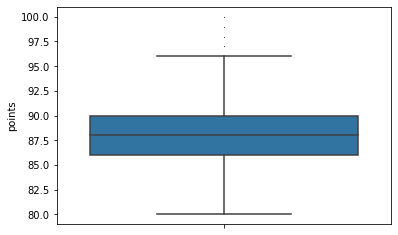

In [151]:
ptsPlot = sns.boxplot(data = df_wine, y=df_wine['points'], orient='v',fliersize = 0.1)

In [152]:
print(df_wine['price'].quantile([0,0.25,0.5,0.75,1]))
print("缺失值个数：" + str(df_wine['price'].isnull().sum()))

0.00       4.0
0.25      16.0
0.50      24.0
0.75      40.0
1.00    2300.0
Name: price, dtype: float64
缺失值个数：13695


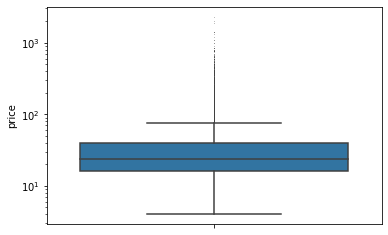

In [153]:
priPlot = sns.boxplot(data = df_wine, y=df_wine['price'], orient='v',fliersize = 0.1)
priPlot.set_yscale('log')

### 数据缺失的处理

数值属性中，price有缺失值。

#### 剔除缺失部分

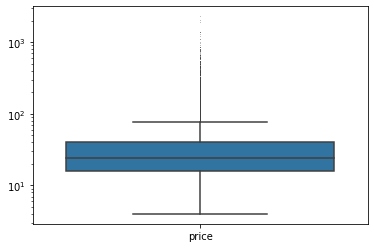

In [154]:
priceFull = pd.DataFrame(df_wine[['price']].dropna())
priceFullPlot = sns.boxplot(data=priceFull, orient='v',fliersize = 0.1)
priceFullPlot.set_yscale('log')

#### 用最高频率值来填补缺失值

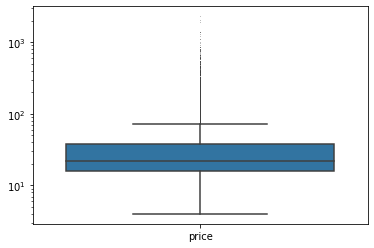

In [155]:
priceFreq = pd.DataFrame(df_wine['price'].fillna(stats.mode(df_wine['price'])[0][0]))
priceFreqPlot = sns.boxplot(data=priceFreq, orient='v',fliersize = 0.1)
priceFreqPlot.set_yscale('log')

#### 通过属性的相关关系来填补缺失值

In [156]:
from sklearn.linear_model import LinearRegression

num = df_wine[['points','price']]
numNa = df_wine[['points','price']][np.isnan(numeric['price'])]
numDropNa = num.dropna().astype(int)

#输入数据
LR = LinearRegression()
LR.fit(numDropNa['points'].to_numpy().reshape(-1,1), numDropNa['price'].to_numpy())

LinearRegression()

In [157]:
#进行预测
LRPred = LR.predict(numNa['points'].to_numpy().reshape(-1,1))
numNa['price'] = LRPred
predPrice = numDropNa.append(numNa).astype(int)['price'].to_numpy()

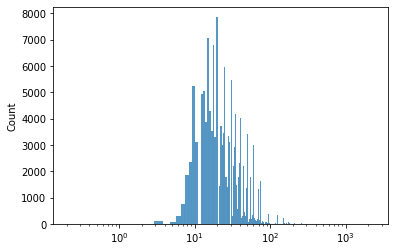

In [158]:
fillFreqPlot = sns.histplot(x = predPrice)
fillFreqPlot.set_xticks(range(0,max(predPrice)))
fillFreqPlot.set_xscale('log')

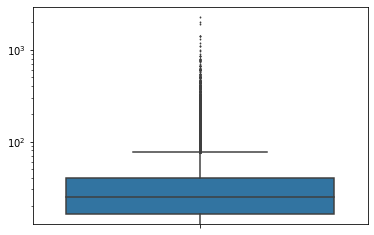

In [159]:
sns.boxplot(y = predPrice,fliersize=1).set_yscale('log')

#### 通过数据对象之间的相似性来填补缺失值

In [160]:
from sklearn.neighbors import KNeighborsRegressor

In [161]:
KNN_instance = KNeighborsRegressor(n_neighbors = 10, weights = "distance")
KNN_instance.fit(numDropNa['points'].to_numpy().reshape(-1,1), numDropNa['price'].to_numpy())

knn = KNN_instance.predict(numNa['points'].to_numpy().reshape(-1,1))
numNa['price']= knn

predKNN = numDropNa.append(numNa).astype(int)['price'].to_numpy()


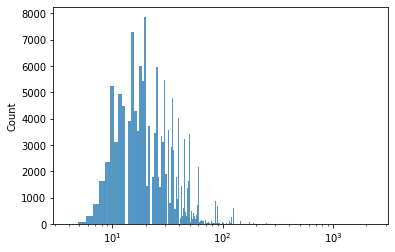

In [162]:
fillKNNPlot = sns.histplot(x = predKNN)
fillKNNPlot.set_xticks(range(0,max(predKNN)))
fillKNNPlot.set_xscale('log')

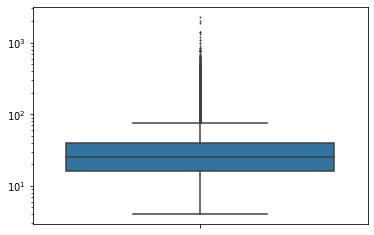

In [163]:
sns.boxplot(y = predKNN,fliersize=1).set_yscale('log')